In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pygmo as pg

from matplotlib import ticker, cm
from mpl_toolkits.mplot3d import Axes3D

%run ../Functions/Test_functions.ipynb

In [27]:
# General function for plotting 3 grid and surface plot of problem
def show_problem(problem_name, points = 100, bounds = None,
                 kwargs_fig = {"fig_size": (14, 28), "dpi": 160},
                 kwargs_fun = {"dim": 2}):
    
    # Define problem
    problem = pg.problem(getattr(pg, problem_name)(**kwargs_fun))
    target = get_target(problem_name, kwargs_fun)[0]
    
    # Get bounds and create grid
    if bounds is None:
        bounds = problem.get_bounds()

    X = np.arange(
        start = bounds[0][0], 
        stop = bounds[1][0], 
        step = (bounds[1][0] - bounds[0][0]) / points, 
    )
    Y = np.arange(
        start = bounds[0][1], 
        stop = bounds[1][1], 
        step = (bounds[1][1] - bounds[0][1]) / points
    )
    
    X, Y = np.meshgrid(X, Y)
    Z = list()
    # Have to loop over all x and y since problem.fitness can't broadcast
    for x, y in zip(X.flatten(), Y.flatten()):
        Z.append(problem.fitness([x, y]))
        
    Z = np.array(Z).reshape(points, points)
    
    fig = plt.figure()
    spec = gridspec.GridSpec(nrows = 1, ncols = 2, figure = fig)
    ax_1 = fig.add_subplot(spec[0, 0])
    ax_2 = fig.add_subplot(spec[0, 1], projection = "3d")
    ax_1.contourf(X, Y, Z, locator = ticker.AutoLocator(), cmap = cm.viridis)
    ax_1.scatter(target[0], target[1], c = "red", marker = "x")
    ax_2.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.viridis)
    fig.suptitle(problem.get_name())
        
    return fig

### Rosenbrock

The Rosenbrock function is a box-constrained continuous single-objective problem. The function can be generalized to $ n $ dimensions. The function has a very flat plane around the global optimum. The main problem for optimizers is not to get stuck in this plane.

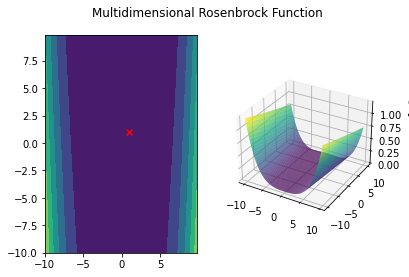

In [28]:
fig_rosenbrock = show_problem("rosenbrock", bounds = [[-10, -10], [10, 10]])
fig_rosenbrock.savefig("../../Plots/Test_Functions/Rosenbrock", dpi = 160)

### Rastrigin
This scalable box-constrained continuous single-objective problem has a many deep local minima. This makes it challenging to solve for many optimizers.

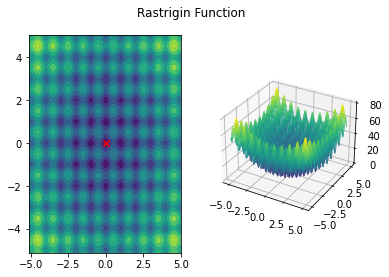

In [29]:
fig_rosenbrock = show_problem("rastrigin")
fig_rosenbrock.savefig("../../Plots/Test_Functions/Rastrigin", dpi = 160)

### Schwefel
This scalable box-constrained continuous single-objective problem. The function has no gradient and is therefore unsolvable for algorithms relying on gradients.

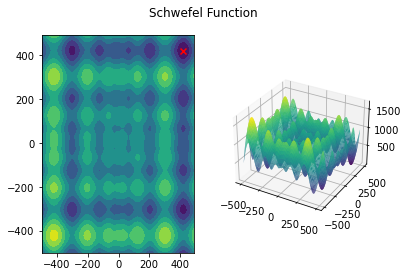

In [30]:
fig_rosenbrock = show_problem("schwefel")
fig_rosenbrock.savefig("../../Plots/Test_Functions/Schwefel", dpi = 160)

### Ackley


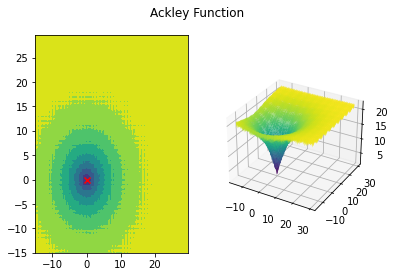

In [31]:
fig_rosenbrock = show_problem("ackley")
fig_rosenbrock.savefig("../../Plots/Test_Functions/Ackley", dpi = 160)

### Griewank

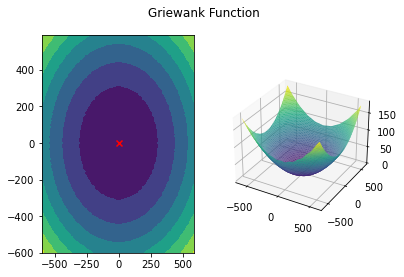

In [32]:
fig_rosenbrock = show_problem("griewank")
fig_rosenbrock.savefig("../../Plots/Test_Functions/Griewank", dpi = 160)